<a href="https://colab.research.google.com/github/ZEBAAFROZ/WordEmbedding/blob/main/Embedding_Gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install -U gensim==4.*

In [2]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy
import tensorflow as tf

from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
!gdown "https://drive.google.com/uc?id=1BpfbHu4denceXiv8yfdY3EHgjKIcULku"

Downloading...
From: https://drive.google.com/uc?id=1BpfbHu4denceXiv8yfdY3EHgjKIcULku
To: /content/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:28<00:00, 57.8MB/s]


In [4]:
embedding_file = './GoogleNews-vectors-negative300.bin.gz'

In [5]:
%%time
word_vectors = KeyedVectors.load_word2vec_format(embedding_file, binary=True, limit=200000)

CPU times: user 2.91 s, sys: 166 ms, total: 3.07 s
Wall time: 3.07 s


In [6]:
pizza = word_vectors['pizza']
print(f'Vector dimension: {pizza.shape}')

# The embedding for the word 'pizza'.
print(pizza)

Vector dimension: (300,)
[-1.25976562e-01  2.53906250e-02  1.66992188e-01  5.50781250e-01
 -7.66601562e-02  1.28906250e-01  1.02539062e-01 -3.94821167e-04
  1.21582031e-01  4.32128906e-02  1.72851562e-01 -6.83593750e-02
  3.41796875e-01  8.39843750e-02  6.68945312e-02  2.67578125e-01
 -3.71093750e-02 -5.56640625e-02  1.80664062e-01  1.90429688e-02
 -5.07812500e-02  9.03320312e-03  1.76757812e-01  6.49414062e-02
 -6.25000000e-02 -9.42382812e-02 -9.71679688e-02  4.00390625e-01
  1.15234375e-01  1.02539062e-01 -1.86767578e-02 -2.69531250e-01
  1.80664062e-01  1.25000000e-01 -3.17382812e-02 -5.49316406e-02
  3.45703125e-01 -1.57470703e-02  1.82390213e-05  2.07031250e-01
 -1.25976562e-01 -2.83203125e-01  2.00195312e-01  8.34960938e-02
 -4.73632812e-02 -3.11279297e-02 -2.61718750e-01  1.69921875e-01
 -2.02636719e-02  1.53320312e-01 -1.20605469e-01  3.75000000e-01
 -5.68847656e-02 -4.76074219e-03 -1.95312500e-01 -2.03125000e-01
  3.00781250e-01 -1.01074219e-01 -3.18359375e-01 -9.03320312e-02


In [7]:
print(word_vectors.similarity('pizza', 'tomato'))
print(word_vectors.similarity('pizza', 'sauce'))
print(word_vectors.similarity('pizza', 'cheese'))

0.35505623
0.36959887
0.47083578


In [8]:
print(word_vectors.similarity('pizza', 'gorilla'))
print(word_vectors.similarity('pizza', 'tree'))
print(word_vectors.similarity('pizza', 'yoga'))

0.108518735
0.11185601
0.14119941


In [9]:
try:
  word_vectors['womblyboo']
except KeyError as e:
  print(e)

"Key 'womblyboo' not present"


In [10]:
word_vectors.n_similarity("dog bites man".split(), "canine nips human".split())

0.5314661

In [11]:
word_vectors.n_similarity("martian dolphins are hostile".split(), "i flunked calligraphy school".split())

0.14505777

In [12]:
word_vectors.n_similarity("dog bites man".split(), "man bites dog".split())

1.0

In [13]:
s1 = "Volkswagen intends to double electric car sales in China".lower().split()
s2 = "First Toyota with solid state battery will be hybrid".lower().split()
word_vectors.n_similarity(s1, s2)

0.52682734

In [14]:
word_vectors.most_similar(positive=['cell'], topn=10)

[('cells', 0.8180485367774963),
 ('Cells', 0.6146953105926514),
 ('Cell', 0.5321314930915833),
 ('cellular', 0.5272858142852783),
 ('tumor_cells', 0.5097643136978149),
 ('ES_cells', 0.4866572618484497),
 ('immune_cells', 0.4831920266151428),
 ('epithelial_cells', 0.47818055748939514),
 ('molecule', 0.47757473587989807),
 ('proteins', 0.4749472737312317)]

In [15]:
word_vectors.most_similar(positive=['cell', 'phone'], topn=10)

[('cell_phone', 0.6861391067504883),
 ('cellular', 0.6757438778877258),
 ('cellphone', 0.6633196473121643),
 ('telephone', 0.6474039554595947),
 ('Phone', 0.605189323425293),
 ('phones', 0.5896332859992981),
 ('cells', 0.585094690322876),
 ('cordless_phone', 0.5711769461631775),
 ('Cell', 0.5617641806602478),
 ('landline', 0.5467296242713928)]

In [16]:
word_vectors.doesnt_match(["apple", "orange", "hamburger", "banana", "kiwi"])

'hamburger'

In [17]:
word_vectors.doesnt_match(["Microsoft", "Apple", "Toyota", "Amazon", "Netflix", "Google"])

'Toyota'

In [18]:
def display_pca_scatterplot(model, words):
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r', s=128)
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

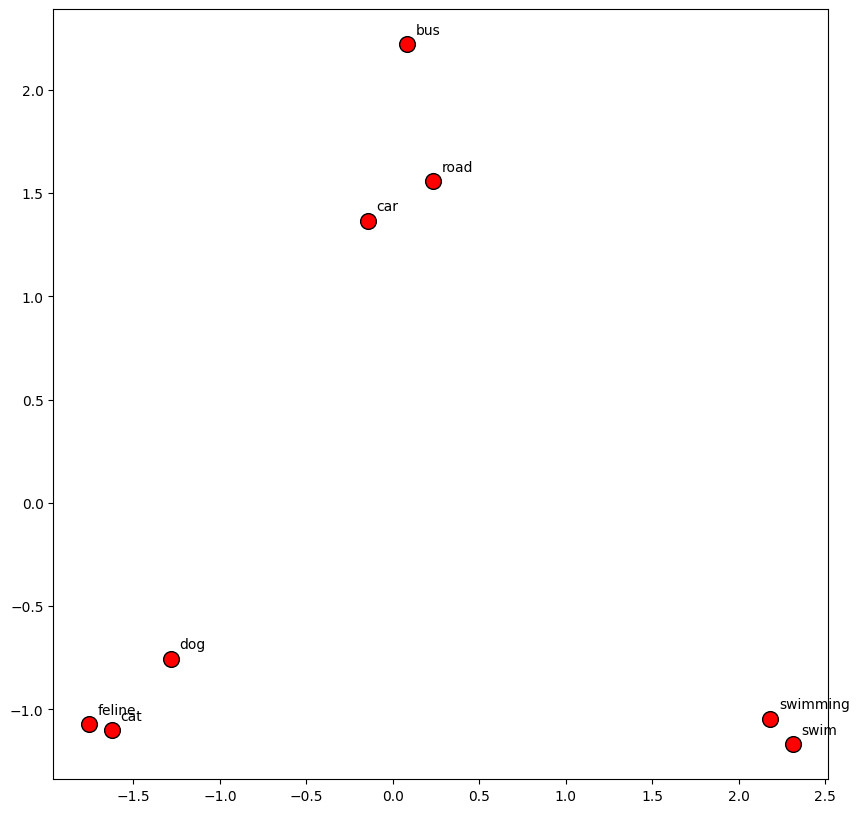

In [19]:
display_pca_scatterplot(word_vectors, ['swim', 'swimming', 'cat', 'dog', 'feline', 'road', 'car', 'bus'])

In [20]:
word_vectors.most_similar(positive=['Italy', 'London'], negative=['Rome'], topn=3)

[('UK', 0.6230568885803223),
 ('Britain', 0.6016390323638916),
 ('United_Kingdom', 0.534345805644989)]

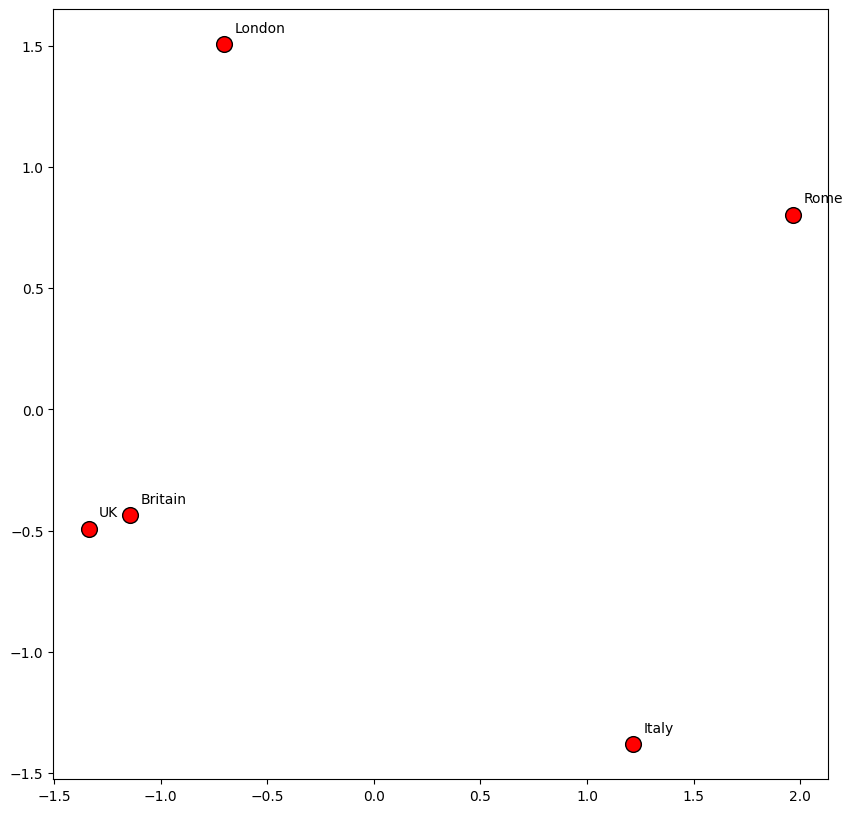

In [21]:
display_pca_scatterplot(word_vectors, ['Rome', 'Italy', 'London', 'Britain', 'UK'])